In [21]:
import pandas as pd

# Load the dataset directly from GitHub
url = 'https://raw.githubusercontent.com/a-lindsay21/sales-trend-analysis/refs/heads/main/data/sample_supermarket_sales.csv'


In [22]:
data = pd.read_csv(url)

# Display the first few rows
print(data.head())
print(data.info())

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

In [23]:
print(data.isnull().sum())
data = data.dropna()


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [25]:
print(data.columns)


Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


In [26]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
data = data.drop_duplicates()

# Check for missing values
print(data.isnull().sum())


Number of duplicate rows: 17
Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [27]:
print(f"Total Sales: {data['Sales'].sum():,.2f}")
print(f"Total Profit: {data['Profit'].sum():,.2f}")
print(f"Average Discount: {data['Discount'].mean():.2%}")


Total Sales: 2,296,195.59
Total Profit: 286,241.42
Average Discount: 15.63%


In [28]:
region_summary = data.groupby('Region')[['Sales', 'Profit']].sum().reset_index()
print(region_summary)


    Region        Sales       Profit
0  Central  500782.8528   39655.8752
1     East  678435.1960   91506.3092
2    South  391721.9050   46749.4303
3     West  725255.6365  108329.8079


In [29]:
category_summary = data.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
print(category_summary)


          Category        Sales       Profit
0        Furniture  741306.3133   18421.8137
1  Office Supplies  718735.2440  122364.6608
2       Technology  836154.0330  145454.9481


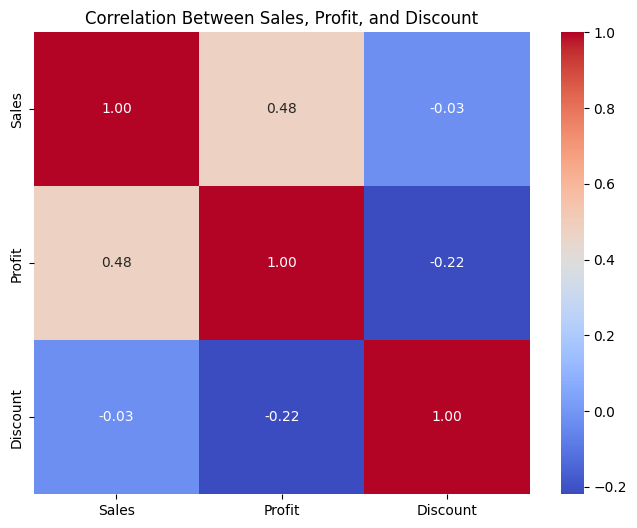

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data[['Sales', 'Profit', 'Discount']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Sales, Profit, and Discount')
plt.show()


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare data
features = data[['Quantity', 'Discount']]
target = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")


Mean Squared Error: 344656.87


In [32]:
from sklearn.ensemble import RandomForestClassifier

# Create a binary column for profitability
data['Profitable'] = (data['Profit'] > 0).astype(int)

# Features and target
features = data[['Sales', 'Discount', 'Quantity']]
target = data['Profitable']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate
accuracy = clf.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2%}")


<ipython-input-32-7aceff32b2fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Profitable'] = (data['Profit'] > 0).astype(int)


Model Accuracy: 93.34%


Visualizations For Report

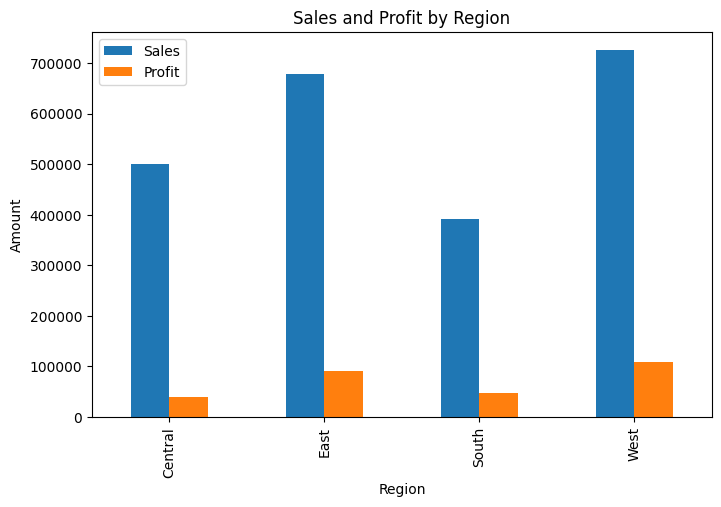

In [33]:
region_summary.plot(kind='bar', x='Region', y=['Sales', 'Profit'], figsize=(8, 5))
plt.title('Sales and Profit by Region')
plt.ylabel('Amount')
plt.show()


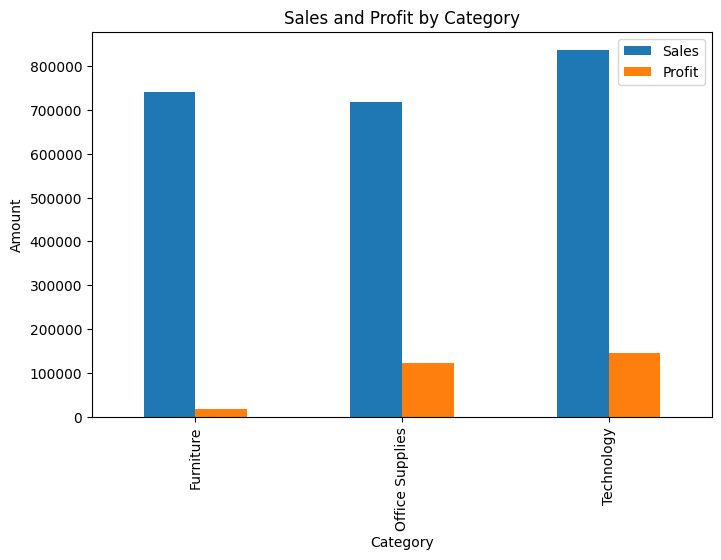

In [34]:
category_summary.plot(kind='bar', x='Category', y=['Sales', 'Profit'], figsize=(8, 5))
plt.title('Sales and Profit by Category')
plt.ylabel('Amount')
plt.show()


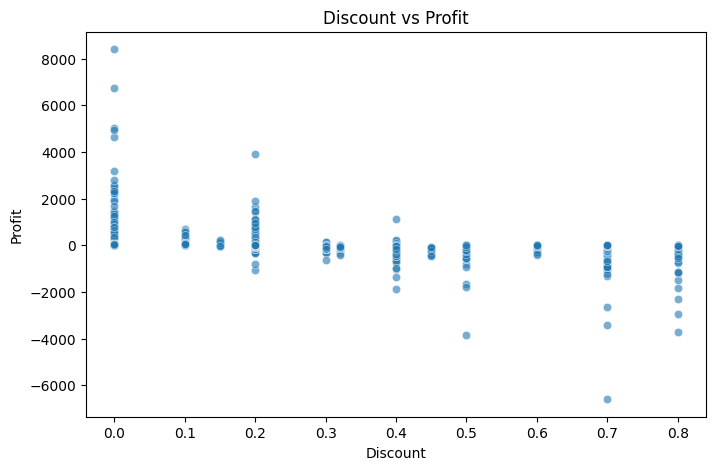

In [35]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Discount', y='Profit', alpha=0.6)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()
